In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
# Read Image
img = cv2.imread('four.png')




# Denoising

In [3]:
# Denoising
dst = cv2.fastNlMeansDenoisingColored(img,None,15,15,7,21)

b,g,r = cv2.split(dst)           # get b,g,r
rgb_dst = cv2.merge([r,g,b])     # switch it to rgb
cv2.imwrite("Denoising_1_copy.jpg", rgb_dst)

True

# Sharping Image

In [4]:
imgIn = cv2.imread("Denoising_1_copy.jpg", cv2.IMREAD_GRAYSCALE)

# Create the identity filter, but with the 1 shifted to the right!
#kernel = np.zeros( (9,9), np.float32)

#Identity, times two! 
#kernel[4,4] = 2.0   

# Create a box filter:
#boxFilter = np.ones( (9,9), np.float32) / 81.0

# Subtract the two:
#kernel = kernel - boxFilter

#sharp_1 = cv2.filter2D(imgIn, -1, kernel)

kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(imgIn, -1, kernel)

# save Result 
cv2.imwrite("sharp_1_copy.jpg", im)

True

# Geomatric mean Filter

In [5]:
img_geoMean = cv2.imread('sharp_1_copy.jpg', cv2.IMREAD_GRAYSCALE).astype(float)
rows, cols = img_geoMean.shape[:2]
ksize = 5 

In [7]:
padsize = int((ksize-1)/2)
pad_img = cv2.copyMakeBorder(img_geoMean, *[padsize]*4, cv2.BORDER_DEFAULT)
geomean = np.zeros_like(img)
for r in range(rows):
    for c in range(cols):
        geomean[r, c] = np.prod(pad_img[r:r+ksize, c:c+ksize])**(1/(ksize**2))
geomean = np.uint8(geomean)

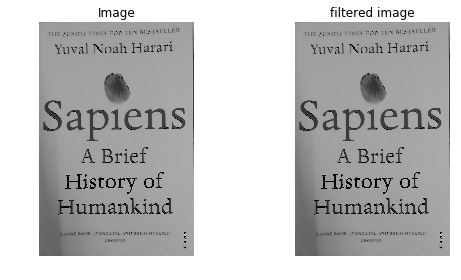

In [9]:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(geomean, cmap=plt.cm.gray)
ax[0].set_title('Image')

ax[1].imshow(geomean, cmap=plt.cm.gray)
ax[1].set_title('filtered image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

In [10]:
cv2.imwrite("Images/filter_1_copy.jpg", geomean)

True

# Edge Detection

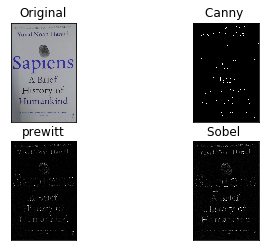

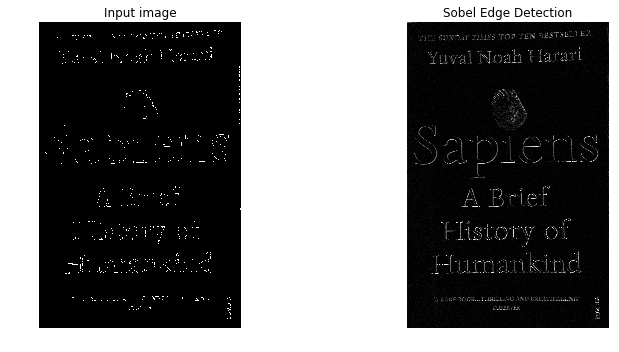

True

In [11]:
img_edge = cv2.imread('Images/filter_1_copy.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

#canny
img_canny = cv2.Canny(img_gaussian,90,210)

#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=3)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=3)
img_sobel = img_sobelx + img_sobely


#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
img_prewitt = img_prewitty + img_prewittx


plt.subplot(2,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img_canny,cmap = 'gray')
plt.title('Canny '), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(img_prewitt,cmap = 'gray')
plt.title('prewitt'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(img_sobel,cmap = 'gray')
plt.title('Sobel '), plt.xticks([]), plt.yticks([])

plt.show()


fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(12, 5))

ax[0].imshow(img_canny, cmap=plt.cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(img_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()
cv2.imwrite("Images/SobelEdgeDetectionTest_copy.jpg", img_sobel)

# Adaptive Mean thresholding

In [12]:
im_at_mean = cv2.adaptiveThreshold(img_sobel, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 10)

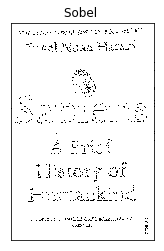

In [22]:
plt.subplot(1,1,1),plt.imshow(im_at_mean,cmap = 'gray')
plt.title('Sobel '), plt.xticks([]), plt.yticks([])
plt.show()

# Adaptive Thresholding with gaussian weighted average

In [23]:
im_at_gauss = cv2.adaptiveThreshold(img_sobel, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5,7)

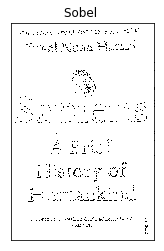

In [24]:
plt.subplot(1,1,1),plt.imshow(im_at_gauss,cmap = 'gray')
plt.title('Sobel '), plt.xticks([]), plt.yticks([])

plt.show()

# Fixed thresholding

In [14]:
retval, im_at_fixed = cv2.threshold(img_sobel, 40, 255, cv2.THRESH_BINARY)

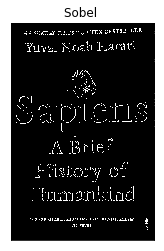

True

In [15]:
plt.subplot(1,1,1),plt.imshow(im_at_fixed,cmap = 'gray')
plt.title('Sobel '), plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite("Images/im_at_fixed_copy.jpg",im_at_fixed)

# Dilation

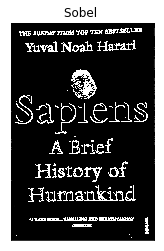

True

In [16]:
img_diln = cv2.imread("Images/im_at_fixed_copy.jpg", cv2.IMREAD_GRAYSCALE)
dilation = cv2.dilate(img_diln,kernel,iterations = 3)

plt.subplot(1,1,1),plt.imshow(dilation,cmap = 'gray')
plt.title('Sobel '), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite("Images/im_at_Morph_copy.jpg",dilation)